In [1]:
from fcc_utils import *
from fcc_DRs import *

Using TensorFlow backend.


In [2]:
import pandas as pd

In [5]:
treated = RNA_counts.from_file(datafile='idling/treated_raw.csv.gz', cells_axis=1)

In [6]:
treated.data.shape

(3524, 25370)

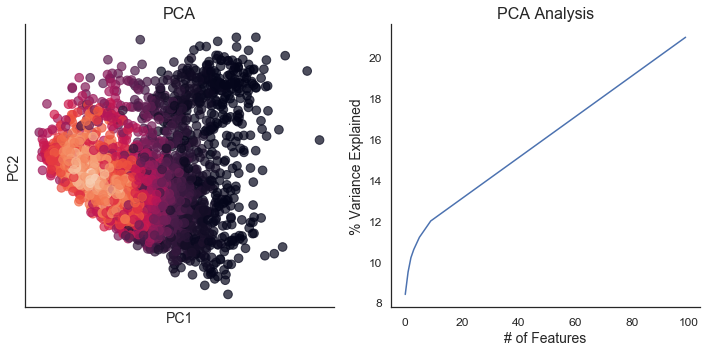

CPU times: user 17.3 s, sys: 2.5 s, total: 19.8 s
Wall time: 13.7 s


In [56]:
%%time
treated_PCA = fcc_PCA(matrix=treated.arcsinh_norm(), n_components=100)
treated_PCA.plot()

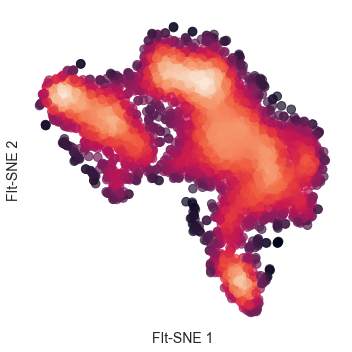

CPU times: user 1.38 s, sys: 181 ms, total: 1.56 s
Wall time: 24.2 s


In [57]:
%%time
treated_tSNE = fcc_FItSNE(matrix=treated_PCA.results, perplexity=30)
treated_tSNE.plot()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x131ac6e10>)

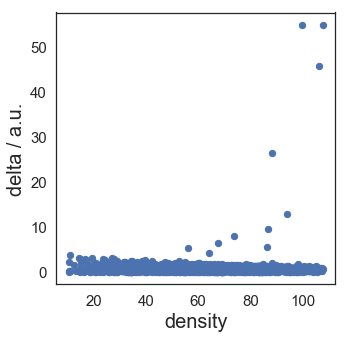

In [58]:
treated_tSNE.clu.draw_decision_graph()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13401e908>)

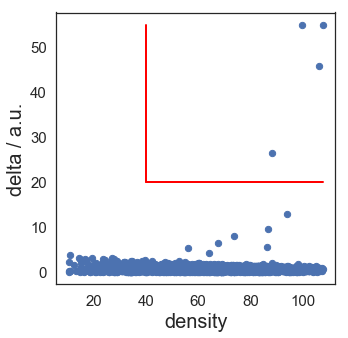

In [59]:
treated_tSNE.clu.assign(40,20)
treated_tSNE.clu.draw_decision_graph(min_delta=treated_tSNE.clu.min_delta, min_density=treated_tSNE.clu.min_density)

0.3841945039612835

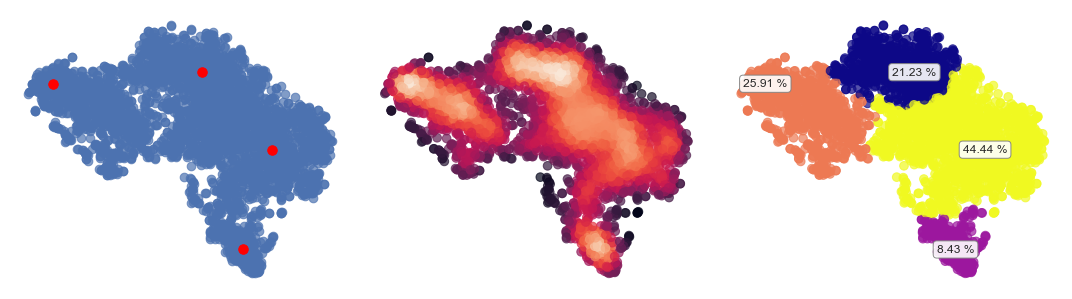

In [61]:
treated_tSNE.plot_clusters()
treated_tSNE.silhouette_score()

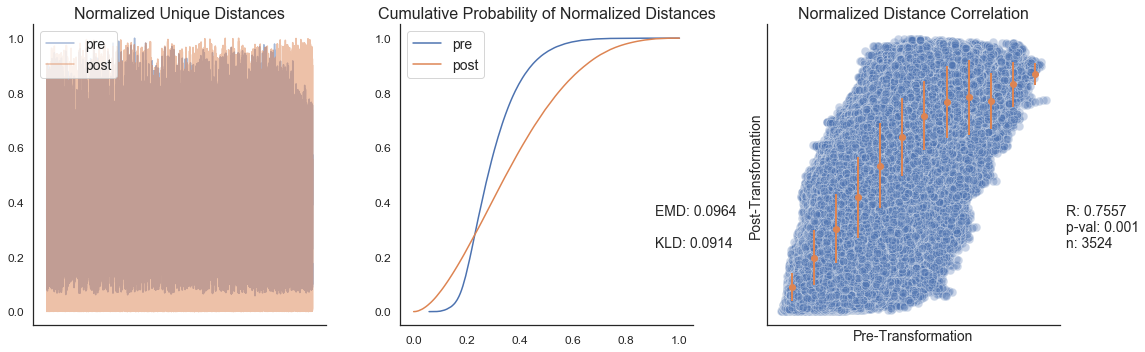

CPU times: user 8min 13s, sys: 45.9 s, total: 8min 59s
Wall time: 14min 31s


((0.7557043370696779, 0.001, 3524), 0.09640140821352972, 0.09141181853480154)

In [62]:
%time compare_euclid(pre=treated_PCA.distance_matrix(), post=treated_tSNE.distance_matrix())

In [16]:
# export PCA and t-SNE results to flat files for sleepwalk testing
pca = pd.DataFrame(treated_PCA.results)
pca.to_csv('treated_pca.csv')

In [17]:
tSNE = pd.DataFrame(treated_tSNE.results)
tSNE.to_csv('treated_tSNE.csv')

In [18]:
untreated = RNA_counts.from_file(datafile='untreated_raw.csv', cells_axis=1)

In [19]:
untreated.data.shape

(2886, 25370)

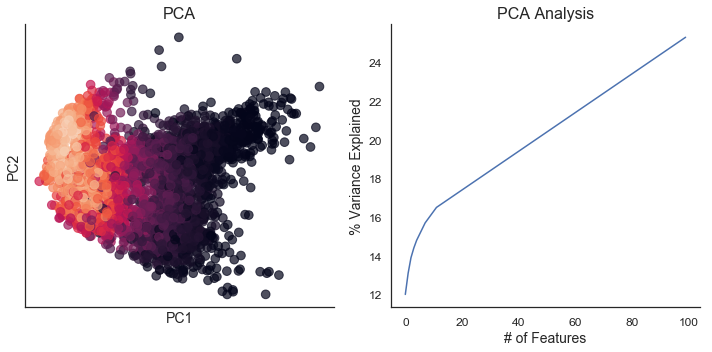

CPU times: user 14.9 s, sys: 3.27 s, total: 18.2 s
Wall time: 13 s


In [20]:
%%time
untreated_PCA = fcc_PCA(matrix=untreated.arcsinh_norm(), n_components=100)
untreated_PCA.plot()

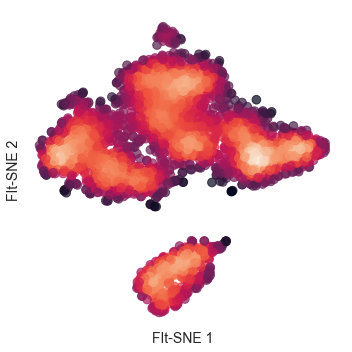

CPU times: user 967 ms, sys: 89.1 ms, total: 1.06 s
Wall time: 25.6 s


In [21]:
%%time
untreated_tSNE = fcc_FItSNE(matrix=untreated_PCA.results, perplexity=30)
untreated_tSNE.plot()

In [22]:
# export PCA and t-SNE results to flat files for sleepwalk testing
pca = pd.DataFrame(untreated_PCA.results)
pca.to_csv('untreated_pca.csv')

In [23]:
tSNE = pd.DataFrame(untreated_tSNE.results)
tSNE.to_csv('untreated_tSNE.csv')

---
Read in barcode information from `.csv` files for each experimental group

In [22]:
treated_bc = pd.read_csv('idling/Treated_LineageBC_cellBC.csv',index_col=0).T

In [96]:
treated_coded = treated.data.merge(treated_bc, left_index=True, right_on='Cell Barcode')
treated_coded = treated_coded.set_index('Cell Barcode', drop=True)

In [101]:
treated_coded.drop('Barcode',axis=1)


,DDX11L1,WASH7P,MIR6859.2,MIR6859.1,FAM138A,FAM138F,OR4F5,LOC729737,LOC100132287,LOC100133331,...,DAZ4,DAZ3,DAZ2,TTTY3B,TTTY3,CDY1B,CDY1,CSPG4P1Y,GOLGA2P3Y,GOLGA2P2Y
Cell Barcode,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGACAGAGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGCAAACCCAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGCAAGGTGTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGCAGCCAATT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGGTACACCGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGGTCCGTGAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGGTGATAAGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGTCACCAGGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGTCCTGTACC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
len(treated_coded['Barcode'].unique())

488

In [117]:
barcode_counts = treated_coded['Barcode'].value_counts()
barcode_counts.where(barcode_counts > 10)

CTGAGAGTGAGTCTGTCAGT    258.0
CTGAGTCAGAGTGACACACT    176.0
CTGACAGACACTCTCAGTCT    139.0
CTGAGTGTGAGAGTGTGTGT    130.0
CTGAGTCACTCACTGAGTGT    125.0
CTGACAGTGTCACACAGTGA    109.0
CTGAGAGACTCTGTGACTGA     97.0
CTGAGAGTCACTGAGTGTGT     71.0
CTGAGTCAGTCACACTCTGT     68.0
CTGAGACTCAGACAGACACT     67.0
CTGACAGTGTGTCAGTCTCT     61.0
CTGACTGTGTGTCAGTGTGA     60.0
CTGACTGTCTGTCAGTGTGT     59.0
CTGAGTGTGACTGTGTGTGA     51.0
CTGAGAGTCAGTGAGTCTCT     48.0
CTGACTGAGAGACTGAGACA     45.0
CTGAGTGTCACTCTCTCAGA     45.0
CTGACTGAGAGTGACACTGA     39.0
CTGACTGACTGTGTCTGTGA     38.0
CTGACAGTGTGTGACTGACT     36.0
CTGACTGTCAGACAGAGTGA     36.0
CTGACACACTGTGACTGTGT     35.0
CTGACTCTGTCACAGAGTGA     34.0
CTGACAGTCACACTGACTCA     31.0
CTGAGAGTGACAGACTCAGT     30.0
CTGAGTGTCACACACACTGA     28.0
CTGACTCAGTCTGTCTGTCA     28.0
CTGACTGTCTGAGAGTCACA     27.0
CTGAGAGACAGAGAGAGTCA     27.0
CTGACTCTCTCTCAGACTGA     26.0
                        ...  
CTGAGTGACAGAGAGACACT      NaN
CTGAGTGTCTCACTCTGAGA      NaN
CTGAGTGTGT

In [115]:
barcode_counts.where(barcode_counts.notnull())

CTGAGAGTGAGTCTGTCAGT    258
CTGAGTCAGAGTGACACACT    176
CTGACAGACACTCTCAGTCT    139
CTGAGTGTGAGAGTGTGTGT    130
CTGAGTCACTCACTGAGTGT    125
CTGACAGTGTCACACAGTGA    109
CTGAGAGACTCTGTGACTGA     97
CTGAGAGTCACTGAGTGTGT     71
CTGAGTCAGTCACACTCTGT     68
CTGAGACTCAGACAGACACT     67
CTGACAGTGTGTCAGTCTCT     61
CTGACTGTGTGTCAGTGTGA     60
CTGACTGTCTGTCAGTGTGT     59
CTGAGTGTGACTGTGTGTGA     51
CTGAGAGTCAGTGAGTCTCT     48
CTGACTGAGAGACTGAGACA     45
CTGAGTGTCACTCTCTCAGA     45
CTGACTGAGAGTGACACTGA     39
CTGACTGACTGTGTCTGTGA     38
CTGACAGTGTGTGACTGACT     36
CTGACTGTCAGACAGAGTGA     36
CTGACACACTGTGACTGTGT     35
CTGACTCTGTCACAGAGTGA     34
CTGACAGTCACACTGACTCA     31
CTGAGAGTGACAGACTCAGT     30
CTGAGTGTCACACACACTGA     28
CTGACTCAGTCTGTCTGTCA     28
CTGACTGTCTGAGAGTCACA     27
CTGAGAGACAGAGAGAGTCA     27
CTGACTCTCTCTCAGACTGA     26
                       ... 
CTGAGTGACAGAGAGACACT      1
CTGAGTGTCTCACTCTGAGA      1
CTGAGTGTGTCAGTCAGAGT      1
CTGACTCAGTCAGAGTGTGA      1
CTGACTCAGAGTCACAGACT

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

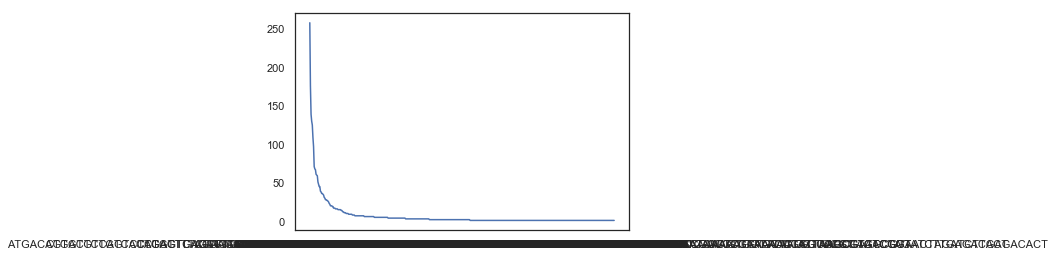

In [55]:
plt.plot(barcodes)
plt.xlabel(None)
plt.show()

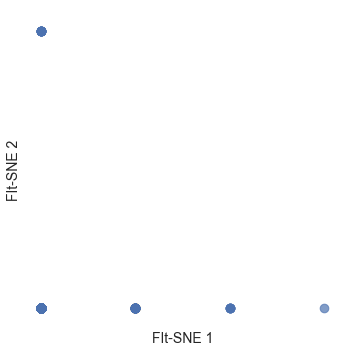

In [124]:
plt.figure(figsize=(5,5))
plt.scatter(data=treated_coded, x='A2M', y='ABAT', s=75, alpha=0.7, cmap='Barcode')
plt.xlabel('FIt-SNE 1', fontsize=14)
plt.ylabel('FIt-SNE 2', fontsize=14)
plt.tick_params(labelbottom=False, labelleft=False)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()